In [1]:
# TF 1.15버전으로 
# GATE연산을 수행하는 Logistic Regression 구현

import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

print(tf.__version__)

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)

# AND Gate
t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                             labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)


# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X:x_data,
                                                     T:t_data})
    if step % 3000 == 0:
        print('loss : {}'.format(loss_val))

# 성능평가(Accuracy)
accuracy = tf.cast(H >= 0.5, dtype=tf.float32)
result = sess.run(accuracy, feed_dict={X:x_data})
print(classification_report(t_data.ravel(),result.ravel()))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
1.15.0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
loss : 1.4443085193634033
loss : 0.35688963532447815
loss : 0.22575920820236206
loss : 0.16707304120063782
loss : 0.13261958956718445
loss : 0.10976819694042206
loss : 0.09348393976688385
loss : 0.08130063116550446
loss : 0.07185323536396027
loss : 0.0643216073513031
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [4]:
# XOR Gate 구현

import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

print(tf.__version__)

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)

t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

# placeholder(roll : input layer)
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W1 = tf.Variable(tf.random.normal([2,100]), name='weight1')
b1 = tf.Variable(tf.random.normal([100]), name='bias1')
hidden1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random.normal([100,6]), name='weight2')
b2 = tf.Variable(tf.random.normal([6]), name='bias2')
hidden2 = tf.sigmoid(tf.matmul(hidden1,W2) + b2)

W3 = tf.Variable(tf.random.normal([6,1]), name='weight3')
b3 = tf.Variable(tf.random.normal([1]), name='bias3')

# Hypothesis
logit = tf.matmul(hidden2,W3) + b3
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                             labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)


# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
for step in range(30000):
    _, loss_val = sess.run([train, loss], feed_dict={X:x_data,
                                                     T:t_data})
    if step % 3000 == 0:
        print('loss : {}'.format(loss_val))

# 성능평가(Accuracy)
accuracy = tf.cast(H >= 0.5, dtype=tf.float32)
result = sess.run(accuracy, feed_dict={X:x_data})
print(classification_report(t_data.ravel(),result.ravel()))

1.15.0
loss : 1.130022644996643
loss : 0.4604445695877075
loss : 0.227171391248703
loss : 0.135743647813797
loss : 0.09457793831825256
loss : 0.07196161150932312
loss : 0.0578434020280838
loss : 0.048250965774059296
loss : 0.04133310914039612
loss : 0.0361194871366024
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)

t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

# 모델 생성
model = Sequential()

# 레이어 추가
# keras_model.add(Flatten(input_shape=(2,)))
model.add(Dense(100, activation='sigmoid', input_shape=(2,)))  # logistic이 100개
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))  # output layer

# compile
model.compile(optimizer=SGD(learning_rate=1e-1), 
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# 학습
history = model.fit(x_data, t_data,
                    epochs=30000, verbose=0)   # verbose는 epoch마다의 결과를 보여줌

# 예측
pred = model.predict(x_data)
result = tf.cast(pred >= 0.5, dtype=tf.float32).numpy().ravel()

print(classification_report(t_data.ravel(),result))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



dict_keys(['loss', 'accuracy'])


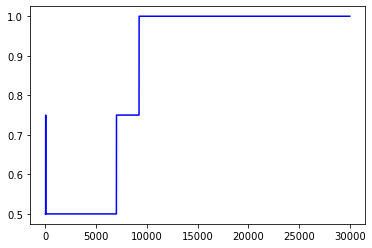

In [3]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'], color='b')
plt.show()